In [1]:
import pandas as pd
import numpy as np
import os
# os.chdir(r"/Users/xavierxiong/Documents/AgileAlgorithmTeaching/Decision Tree/data&code")

In [3]:
df=pd.read_csv(r"./data/loan_net.csv",skipinitialspace=True)
df.head()

,net_size,degree,average_neighbor_degree,percentage,flag
0,2,1,1.0,0.0,1
1,2,1,1.0,0.0,0
2,2,1,1.0,0.0,0
3,2,1,1.0,0.0,0
4,2,1,1.0,0.0,0


In [4]:
df.flag.value_counts()

flag
0    27250
1       71
Name: count, dtype: int64

In [5]:
#确定自变量 因变量
target=df["flag"].copy()
data=df.iloc[:,:4].copy()

In [6]:
# data
#将数据集划分训练和测试
from sklearn.model_selection import train_test_split
train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.4,train_size=0.6,random_state=1234,stratify=target)

In [7]:
print(len(train_data))
print(len(test_data))
# print(10929/(10929+16392))

16392
10929


In [8]:
#使用决策树算法建模
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [9]:
#初始化决策树分类器
clf=DecisionTreeClassifier(random_state=42)
#交叉验证评估模型性能
cv_score=cross_val_score(clf,train_data,train_target,cv=5,scoring="roc_auc")
np.mean(cv_score)


0.6518490711194973

In [9]:
# # #网格搜索
# # param_grid={
# #     "criterion":["entropy","gini"],#当前计算的指标
# #     "max_depth":[2,3,4,5],#树的最大深度
# #     "min_sample_split":[2,4,6,8,10],#停止分裂的最小样本量
# #     "min_sample_leaf":[2,4,6,8,10],#停止分裂的叶子节点最小样本量
# #     "class_weight":[{0:1,1:1},{0:1,1:2},{0:1,1:3}]#类别的权重
# #     }
# dtree=DecisionTreeClassifier()
# dtree_cv=GridSearchCV(estimator=dtree,
#                       param_grid=param_grid,
#                       scoring="roc_auc",
#                        cv=4)


In [10]:
param_grid={
    "criterion":["entropy","gini"],#当前支持计算信息增益和GiNi
    "max_depth":[1,2,3,4,5,6],#树的最大深度
    "min_samples_split":[1,2,4,6],#停止分裂的最小样本量
    "min_samples_leaf":[1,2,4,6],#停止分裂的叶节点最小样本量
    "class_weight":[{0:1,1:1},{0:1,1:2},{0:1,1:3}]#类别的权重
}

In [11]:
dtree=DecisionTreeClassifier()
dtree_cv=GridSearchCV(estimator=dtree,
                     param_grid=param_grid,
                     scoring="roc_auc",
                     cv=4)
dtree_cv.fit(train_data,train_target)

C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
576 fits failed out of a total of 2304.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
576 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\sklearn\base.py", line 637, in _validate_params
    validate_parameter_constraints(
  File "C:\User

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'class_weight': [{0: 1, 1: 1}, {0: 1, 1: 2},
                                          {0: 1, 1: 3}],
                         'criterion': ['entropy', 'gini'],
                         'max_depth': [1, 2, 3, 4, 5, 6],
                         'min_samples_leaf': [1, 2, 4, 6],
                         'min_samples_split': [1, 2, 4, 6]},
             scoring='roc_auc')

In [12]:
 dtree_cv.best_score_

0.6563462499684957

In [13]:
#随机搜索
from sklearn.model_selection import RandomizedSearchCV
param_grid1={
    "criterion":["entropy","gini"],#当前支持计算信息增益和GiNi
    "max_depth":np.arange(2,20,step=2),#树的最大深度
    "min_samples_split":np.arange(2,30,step=2),#停止分裂的最小样本量
    "min_samples_leaf":np.arange(2,30,step=2),#停止分裂的叶节点最小样本量
    "class_weight":[{0:1,1:1},{0:1,1:2},{0:1,1:3}]#类别的权重   
}
dtree_RS=RandomizedSearchCV(estimator=dtree,
                   param_distributions=param_grid1,
                   n_iter=100,
                   cv=4,
                   scoring="roc_auc",
                   n_jobs=-1)
dtree_RS.fit(train_data,train_target)

RandomizedSearchCV(cv=4, estimator=DecisionTreeClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'class_weight': [{0: 1, 1: 1},
                                                         {0: 1, 1: 2},
                                                         {0: 1, 1: 3}],
                                        'criterion': ['entropy', 'gini'],
                                        'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'min_samples_leaf': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28])},
                   scoring='roc_auc')

In [14]:
dtree_RS.best_params_

{'min_samples_split': 16,
 'min_samples_leaf': 4,
 'max_depth': 2,
 'criterion': 'gini',
 'class_weight': {0: 1, 1: 2}}

In [15]:
#  pip install bayesian-optimization
#贝叶斯优化
from bayes_opt import BayesianOptimization

In [16]:
def dtrees_cv(max_depth,min_samples_split,min_samples_leaf):
    cvs=cross_val_score(
        DecisionTreeClassifier(max_depth=int(max_depth),
                               min_samples_split=int(min_samples_split),
                               min_samples_leaf=int(min_samples_leaf),
                               random_state=2
    ),train_data,train_target,scoring="roc_auc",cv=4
    ).mean()
    return cvs
#建立贝叶子优化对象
dtrees_BO=BayesianOptimization(
    dtrees_cv,
    {"max_depth":(2,20),
     "min_samples_split":(2,35),
     "min_samples_leaf":(2,35)}
)

In [17]:
#开始优化
dtrees_BO.maximize()

|   iter    |  target   | max_depth | min_sa... | min_sa... |
-------------------------------------------------------------
| 1         | 0.6506    | 7.061     | 7.46      | 34.98     |
| 2         | 0.6469    | 11.65     | 30.16     | 23.94     |
| 3         | 0.6501    | 13.47     | 12.76     | 25.77     |
| 4         | 0.6506    | 12.58     | 2.975     | 10.69     |
| 5         | 0.6261    | 18.03     | 24.78     | 3.377     |
| 6         | 0.6506    | 12.25     | 3.16      | 9.077     |
| 7         | 0.6529    | 2.0       | 35.0      | 35.0      |
| 8         | 0.6246    | 20.0      | 27.28     | 35.0      |
| 9         | 0.6563    | 2.0       | 7.275     | 21.37     |
| 10        | 0.6327    | 2.0       | 20.35     | 24.63     |
| 11        | 0.6506    | 8.06      | 2.309     | 24.26     |
| 12        | 0.6563    | 2.0       | 2.594     | 13.93     |
| 13        | 0.6563    | 2.0       | 10.63     | 9.474     |
| 14        | 0.6563    | 2.644     | 2.629     | 2.289     |
| 15    

In [18]:
#寻找最大值
dtrees_BO.max

{'target': 0.6563462499684957,
 'params': {'max_depth': 2.0,
  'min_samples_leaf': 7.275480398989448,
  'min_samples_split': 21.367751997935702}}

In [19]:
# ! pip install pydotplus

In [19]:
#决策树可视化
import pydotplus
from IPython.display import Image
import sklearn.tree as tree
%matplotlib inline

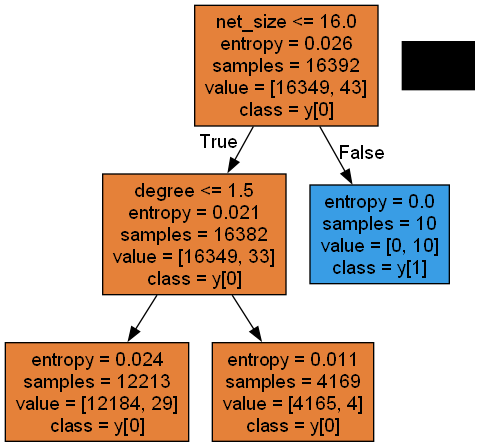

In [20]:
#获取网格搜索的最优模型
best_tree=dtree_cv.best_estimator_
#生成dot文件
dot_data=tree.export_graphviz(
    best_tree,
    out_file=None,
    feature_names=data.columns,
    max_depth=3,
    class_names=True,
    filled=True
)
#用dot文件生成决策树图形
graph=pydotplus.graph_from_dot_data(dot_data)
Image(graph.create_png())

In [21]:
#利用决策树模型进行预测，并且生成决策类评估指标
from sklearn.metrics import classification_report

In [22]:
#预测值
test_est=best_tree.predict(test_data)
# test_est

In [23]:
#计算评估指标
print(classification_report(test_target,test_est,digits=3))

              precision    recall  f1-score   support

           0      0.998     1.000     0.999     10901
           1      1.000     0.214     0.353        28

    accuracy                          0.998     10929
   macro avg      0.999     0.607     0.676     10929
weighted avg      0.998     0.998     0.997     10929



In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve,average_precision_score
from sklearn.metrics import roc_curve,auc
#绘制roc PR KS 曲线
def plot_metrics_curve(test_target,train_target,test_proba,train_proba):
    fpr_test, tpr_test, th_test = roc_curve(test_target, test_proba)
    fpr_train, tpr_train, th_train = roc_curve(train_target, train_proba)
    precision_test, recall_test, _ = precision_recall_curve(test_target, 
                                                            test_proba)
    precision_train, recall_train, _ = precision_recall_curve(train_target,
                                                              train_proba)
    
    #  ROC curve
    plt.figure(figsize=[6, 6])
    plt.subplot(221)
    plt.plot(fpr_test, tpr_test, 'b--')
    plt.plot(fpr_train, tpr_train, 'r-')
    plt.xlabel('fpr')
    plt.ylabel('tpr')
    plt.title('ROC curve:Test is dotted line')
    
    # PR curve
    plt.subplot(222)
    plt.plot(recall_test, precision_test, 'b--')
    plt.plot(recall_train, precision_train, 'r-')
    plt.xlabel('recall')
    plt.ylabel('precision')
    plt.title('PR curve:Test is dotted line')
    
    # KS curve, 曲线按阈值降序排列，所以需要1-threshold镜像
    plt.subplot(212)
    plt.plot(1 - th_test, tpr_test, 'b--', label='tpr') 
    plt.plot(1 - th_test, fpr_test, 'b:', label='fpr')
    plt.plot(1 - th_test, tpr_test - fpr_test, 'r-', label='tpr-fpr')
    plt.xlabel('score')
    plt.title('KS Curve  KS= %0.2f' %max(tpr_test - fpr_test))
    legend = plt.legend(loc='upper left', shadow=True, fontsize='x-large')
    
    plt.tight_layout()
    plt.show()
    
    # Print ROC-AUC 
    print('TestAUC=%.4f,' %auc(fpr_test, tpr_test),
          'TrainAUC=%.4f' %auc(fpr_train, tpr_train))
    # Print average precision score
    print('TestAP=%.4f,'%average_precision_score(test_target,test_proba),
          'TrainAP=%.4f'%average_precision_score(train_target,train_proba))

In [25]:
# test_proba=best_tree.predict_proba(test_data)[:,1]
# train_proba=best_tree.predict_proba(train_data)[:,1]

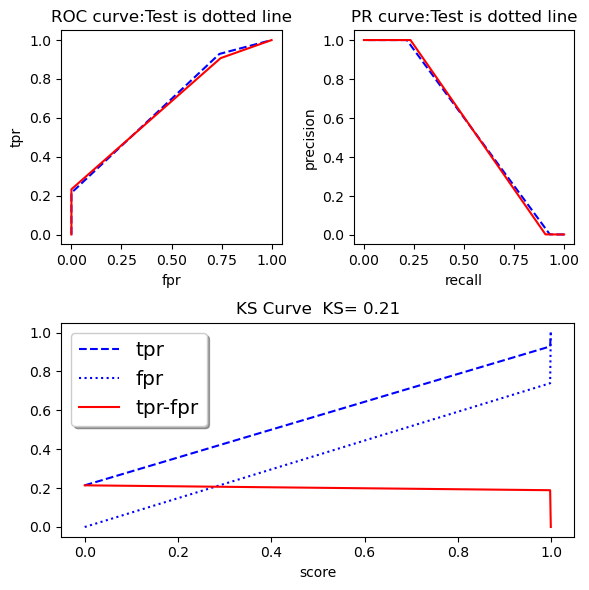

TestAUC=0.6738, TrainAUC=0.6675
TestAP=0.2168, TrainAP=0.2350


In [26]:
#绘制评估图形
#使用这个编写的函数绘制评估图形并计算评估指标
#预测概率
test_proba=best_tree.predict_proba(test_data)[:,1]
train_proba=best_tree.predict_proba(train_data)[:,1]
plot_metrics_curve(test_target,train_target,test_proba,train_proba)